In [ ]:
# 必要なライブラリをインストール
!pip install pycausalimpact

# 必要なライブラリをインポート
from causalimpact import CausalImpact
import pandas as pd


In [ ]:
# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# データの読み込み（reserve_date、day、gakuの3列を指定して読み込む）
data = pd.read_csv(data_path, usecols=['reserve_date', 'day', 'gaku'], parse_dates=['reserve_date'], encoding='cp932')

# reserve_date列をインデックスに設定
data.set_index('reserve_date', inplace=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    73.56              1177.0
Prediction (s.d.)         67.02 (13.64)      1072.32 (218.16)
95% CI                    [40.96, 94.41]     [655.38, 1510.56]

Absolute effect (s.d.)    6.54 (13.64)       104.68 (218.16)
95% CI                    [-20.85, 32.6]     [-333.56, 521.62]

Relative effect (s.d.)    9.76% (20.34%)     9.76% (20.34%)
95% CI                    [-31.11%, 48.64%]  [-31.11%, 48.64%]

Posterior tail-area probability p: 0.32
Posterior prob. of a causal effect: 67.83%

For more details run the command: print(impact.summary('report'))


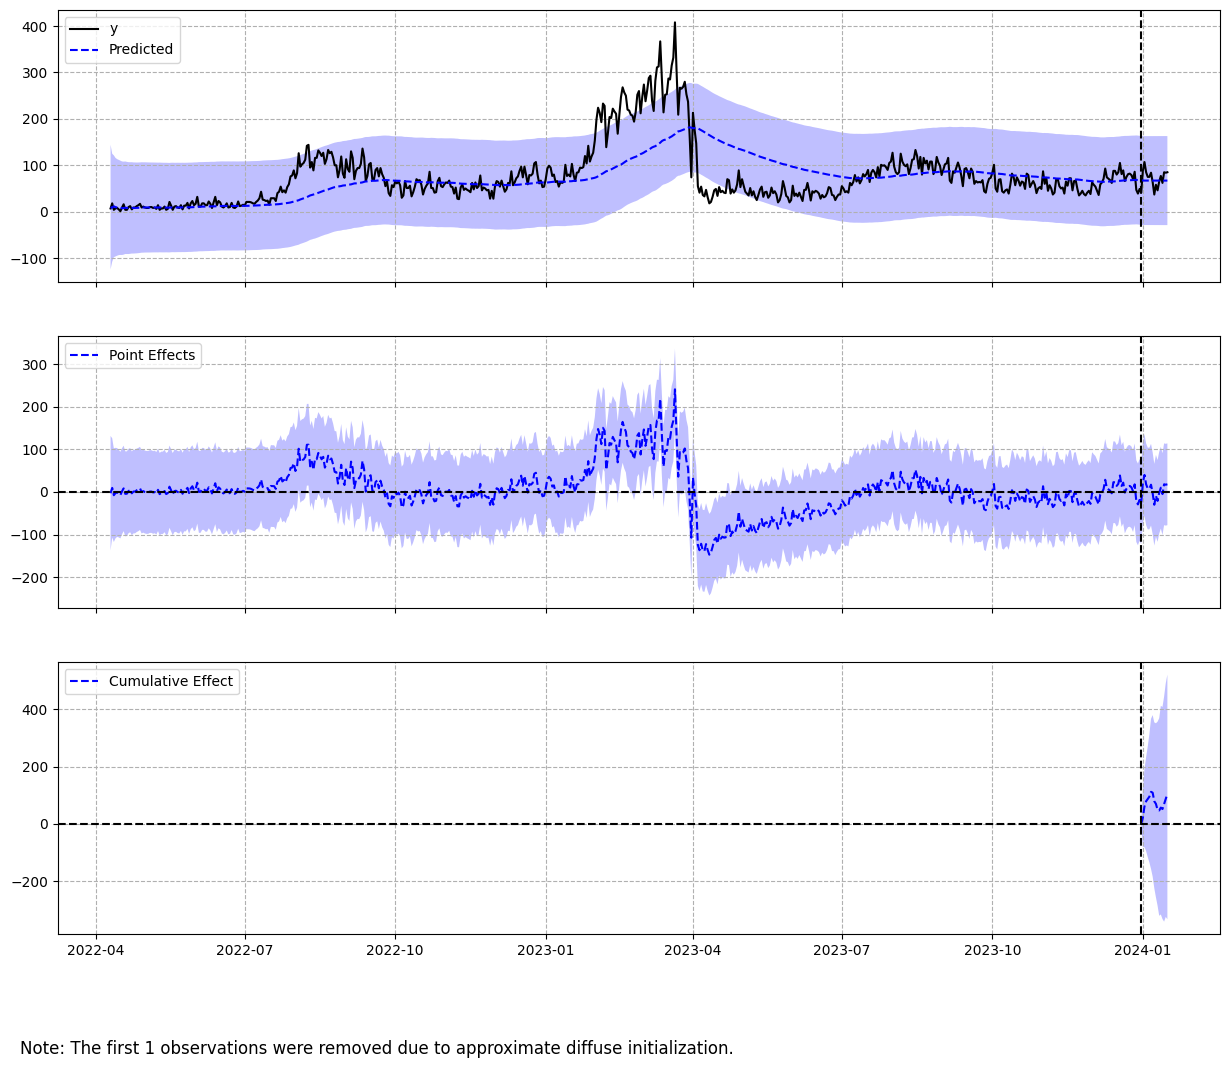

In [15]:
# 必要なライブラリをインポート
from causalimpact import CausalImpact
import pandas as pd

# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

# データのパス
data_path = '/content/drive/MyDrive/04_data/SPL/sample20240324.csv'

# データの読み込み
data = pd.read_csv(data_path, parse_dates=['reserve_date'], index_col='reserve_date')

# Pre.periodとPost.periodの設定
pre_period = ['2022-04-09', '2023-12-31']  # キャンペーン前の期間を指定
post_period = ['2024-01-01', '2024-01-16']  # キャンペーン後の期間を指定

# CausalImpactモデルの作成と介入効果の検証
impact = CausalImpact(data['gaku'], pre_period=pre_period, post_period=post_period)

# 結果の表示
print(impact.summary())

# プロット
impact.plot()